In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.subplots as sp

In [2]:
pd.options.display.max_columns=None

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [4]:
df.shape

(2640, 35)

In [5]:
df.head(1)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749


In [6]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [7]:
df.date = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M').dt.strftime('%m/%d/%Y')

In [8]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [9]:
df['country'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['organization'].fillna('Unknown', inplace=True)
df['residenceStateRegion'].fillna('Unknown', inplace=True)
df['state'].fillna('Unknown', inplace=True)
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype(float)

In [10]:
country_region_dict = {
    'France': 'Europe',
    'United States': 'North America',
    'Mexico': 'Latin America and the Caribbean',
    'India': 'Asia',
    'Spain': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Hong Kong': 'Asia',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Switzerland': 'Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'Russia': 'Europe',
    'Chile': 'Latin America and the Caribbean',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Brazil': 'Latin America and the Caribbean',
    'Czech Republic': 'Europe',
    'Singapore': 'Asia',
    'Sweden': 'Europe',
    'Thailand': 'Asia',
    'Netherlands': 'Europe',
    'Nigeria': 'Africa',
    'Cyprus': 'Asia',
    'Malaysia': 'Asia',
    'United Arab Emirates': 'Asia',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Monaco': 'Europe',
    'Belgium': 'Europe',
    'South Korea': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'Europe',
    'Egypt': 'Africa',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'Latin America and the Caribbean',
    'Poland': 'Europe',
    'Ukraine': 'Europe',
    'Greece': 'Europe',
    'Turkey': 'Asia',
    'Argentina': 'Latin America and the Caribbean',
    'Georgia': 'Asia',
    'Portugal': 'Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Venezuela': 'Latin America and the Caribbean',
    'Vietnam': 'Asia',
    'Finland': 'Europe',
    'Belize': 'Latin America and the Caribbean',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Iceland': 'Europe',
    'Guernsey': 'Europe',
    'Liechtenstein': 'Europe',
    'Bulgaria': 'Europe',
    'Romania': 'Europe',
    'Zimbabwe': 'Africa',
    'Qatar': 'Asia',
    'Nepal': 'Asia',
    'Slovakia': 'Europe',
    'Morocco': 'Africa',
    'Hungary': 'Europe',
    'Tanzania': 'Africa',
    'Peru': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Macau': 'Asia',
    'Estonia': 'Europe',
    'St. Kitts and Nevis': 'Latin America and the Caribbean',
    'Armenia': 'Asia',
    'Bangladesh': 'Asia',
    'Panama': 'Latin America and the Caribbean',
    'Uzbekistan': 'Asia',
    'Bahamas': 'Latin America and the Caribbean',
    'Cayman Islands': 'Latin America and the Caribbean',
    'Latvia': 'Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'Europe',
    'British Virgin Islands': 'Latin America and the Caribbean',
    'Cambodia': 'Asia',
    'Turks and Caicos Islands': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Bahrain': 'Asia',
    'Andorra': 'Europe',
    'Unknown': 'Unknown'
}

df['regionOfCitizenship']=[country_region_dict[x] for x in df.countryOfCitizenship]

In [11]:
def format_final_worth(value):
    return f"${value} B"

df['Net worth in B'] = (df['finalWorth']/1000).apply(format_final_worth)



table = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'Name', 'Net worth', 'Age', 'Country', 'Source', 'Industries']),
    cells=dict(values=[df['rank'], df['personName'], df['Net worth in B'], df['age'], df['countryOfCitizenship'], df['source'], df['industries']])
)])

df = df.drop(columns=['Net worth in B'])

table.update_layout(width=1200, height=515)

table.show()


In [12]:
billionaires = df.shape[0]
worth = df.finalWorth.sum()/1000000
data_collection_date = df.date[0]

print(f"Number of billionaires: {billionaires}")
print(f"Total wealth (in trillion dollars): {worth}")
print(f"Data collection date: {data_collection_date}")

Number of billionaires: 2640
Total wealth (in trillion dollars): 12.2068
Data collection date: 04/04/2023


In [13]:
country_counts = df['countryOfCitizenship'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Billionaires']

country_counts['Rank'] = country_counts['Number of Billionaires'].rank(ascending=False, method='dense')
table = go.Figure(data=[go.Table(
    header=dict(values=['Rank', 'Country', 'Number of Billionaires']),
    cells=dict(values=[country_counts['Rank'], country_counts['Country'], country_counts['Number of Billionaires']])
)])

table.update_layout(width=1000, height=310)

table.show()

In [14]:
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Number of Billionaires",
                    hover_name="Country",
                    color_continuous_scale="Emrld",
                    title="Number of Billionaires by Country")

fig.update_layout(width=1000, height=600)
fig.show()

In [15]:
country_region_df = pd.DataFrame(list(country_region_dict.items()), columns=['Country', 'Region'])

countries_in_df = df['countryOfCitizenship'].unique()

countries_count_by_region = country_region_df[country_region_df['Country'].isin(countries_in_df)]\
    .groupby('Region').size().reset_index(name='Country Count')

billionaire_count_df  = df.regionOfCitizenship.value_counts().reset_index()
billionaire_count_df .columns = ['Region', 'Number of Billionaires']

merged_df = countries_count_by_region.merge(billionaire_count_df, on='Region', how='left').sort_values(by='Number of Billionaires',ascending=False)



table = go.Figure(data=[go.Table(
    header=dict(values=['Region', 'Country Count', 'Number of Billionaires']),
    cells=dict(values=[merged_df['Region'], merged_df['Country Count'], merged_df['Number of Billionaires']])
)])

table.update_layout(width=900, height=330)

table.show()


In [16]:
city_count_df  = df.city.value_counts().reset_index()
city_count_df.columns = ['City', 'Number of Billionaires']

city_count_df['Rank'] = city_count_df.index + 1

table = go.Figure(data=[go.Table(
    header=dict(values=['Rank','City','Number of Billionaires']),
    cells=dict(values=[city_count_df['Rank'],city_count_df['City'], city_count_df['Number of Billionaires']])
)])

table.update_layout(width=700, height=310)

table.show()

In [17]:
fig1 = px.pie(df, names='gender',hole=.5)
fig1.update_traces(textinfo='percent+label')

fig2 = px.pie(df[df.gender=='M'], names='selfMade',hole=.5)
fig2.update_traces(textinfo='percent+label')

fig3 = px.pie(df[df.gender=='F'], names='selfMade',hole=.5)
fig3.update_traces(textinfo='percent+label')

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'},{'type': 'sunburst'}]])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

fig.update_layout(height=400, showlegend=False, title_text="Distribution of Gender and SelfMade by Gender")
fig.add_annotation(dict(x=0.14, y=-0.1, ax=0, ay=0, text="% Gender Distribution"))
fig.add_annotation(dict(x=0.50, y=-0.1, ax=0, ay=0, text="% SelfMade (M)"))
fig.add_annotation(dict(x=0.85, y=-0.1, ax=0, ay=0, text="% SelfMade (F)"))

fig.show()

In [18]:
df['age'].describe()

count    2575.000000
mean       65.140194
std        13.258098
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64

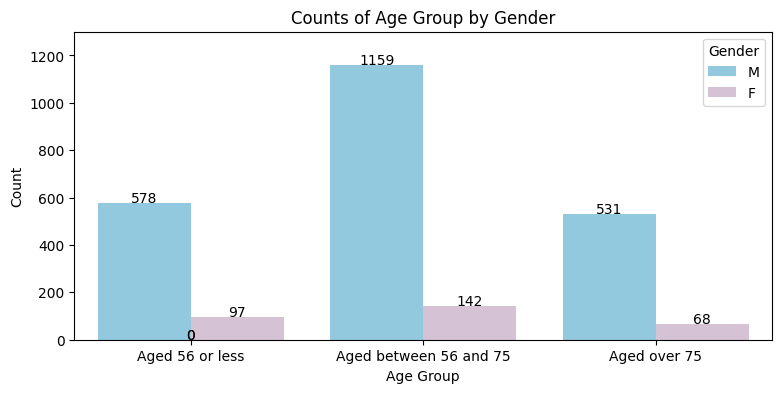

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 56, 75, float('inf')], labels=['Aged 56 or less', 'Aged between 56 and 75', 'Aged over 75'])

plt.figure(figsize=(9, 4))
ax = sns.countplot(x='age_group', hue='gender', data=df, palette={'M': 'skyblue', 'F': 'thistle'})

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Counts of Age Group by Gender')

for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    plt.text(p.get_x() + w / 2, p.get_height() + 2, f'{int(h)}', ha='center')

plt.legend(title='Gender', labels=['M', 'F'])

df = df.drop(columns=['age_group'])
plt.ylim(0, 1300)
plt.show()


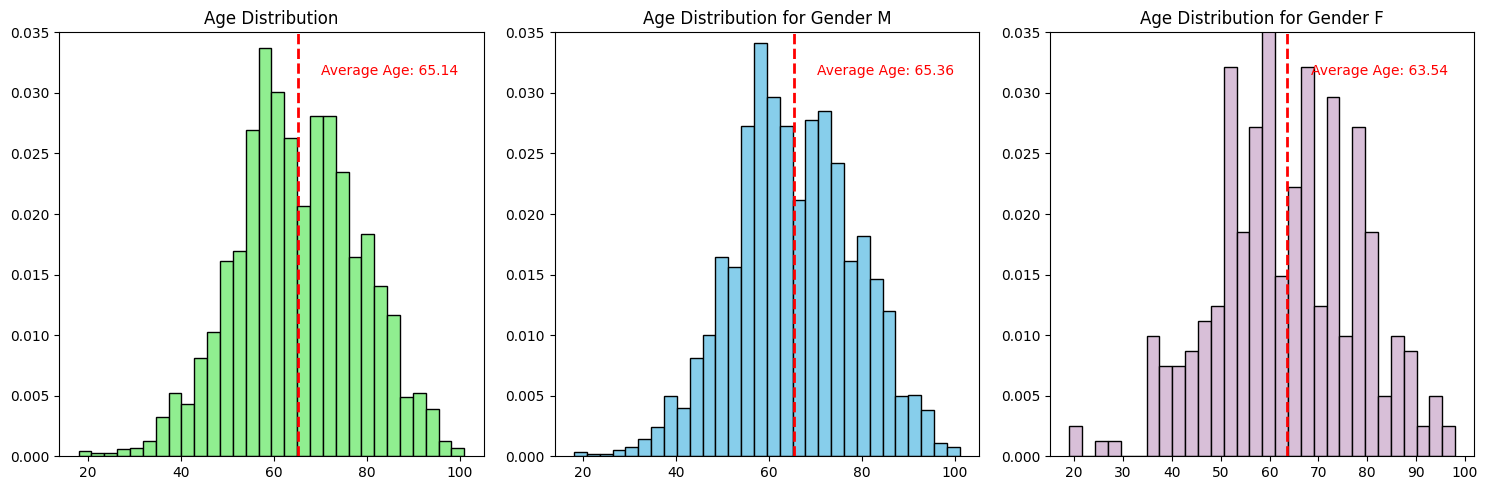

In [20]:
max_y = 0.035

plt.figure(figsize=(15, 5))
plt.subplot(131)
average_age =  df['age'].mean()
plt.hist(df['age'], bins=30, color='lightgreen', edgecolor='black', density=True)
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2, label='Average Age')
plt.text(average_age + 5, max_y * 0.9, f'Average Age: {average_age:.2f}', color='red', fontsize=10)
plt.title('Age Distribution')
plt.ylim(0, max_y)

plt.subplot(132)
average_age =  df[df['gender'] == 'M']['age'].mean()
plt.hist(df[df['gender'] == 'M']['age'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2, label='Average Age')
plt.text(average_age + 5, max_y * 0.9, f'Average Age: {average_age:.2f}', color='red', fontsize=10)
plt.title('Age Distribution for Gender M')
plt.ylim(0, max_y)

plt.subplot(133)
average_age =  df[df['gender'] == 'F']['age'].mean()
plt.hist(df[df['gender'] == 'F']['age'], bins=30, color='thistle', edgecolor='black', density=True)
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2, label='Average Age')
plt.text(average_age + 5, max_y * 0.9, f'Average Age: {average_age:.2f}', color='red', fontsize=10)
plt.title('Age Distribution for Gender F')
plt.ylim(0, max_y)

plt.tight_layout()
plt.show()

In [21]:
print("Oldest billionaires")

display(df[df['age'] == df.age.max()])

Oldest billionaires


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,regionOfCitizenship
2180,2133,1300,Finance & Investments,George Joseph,101.0,United States,Los Angeles,Insurance,Finance & Investments,United States,Unknown,True,D,M,9/11/1921 0:00,Joseph,George,Unknown,04/04/2023,California,West,1921.0,9.0,11.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891,North America


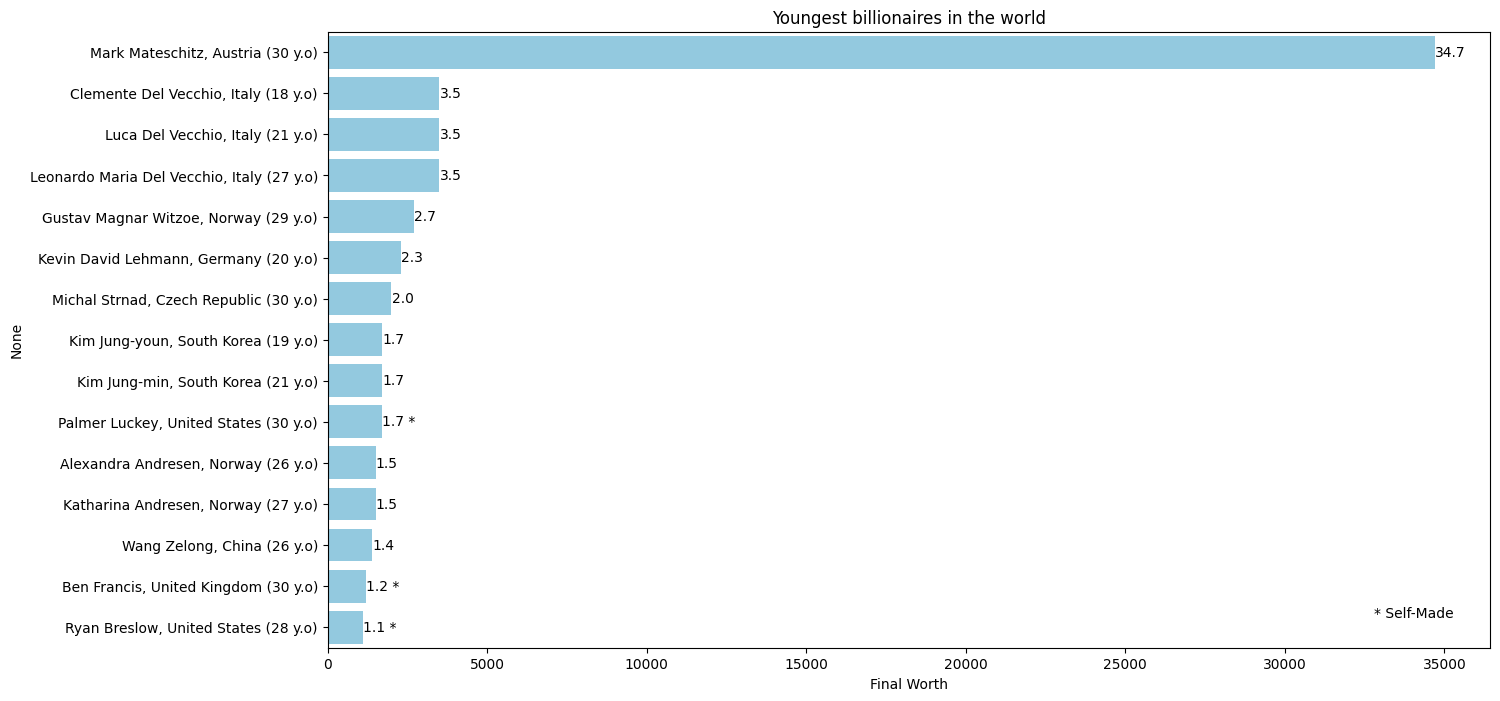

In [22]:
top_youngest=df[df['age']<=30].copy()
top_youngest=top_youngest.sort_values(by=['age']).sort_values(by=['finalWorth'],ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='finalWorth',
            y=top_youngest['personName'] + ', ' + top_youngest['countryOfCitizenship'] + ' (' + top_youngest['age'].astype(int).astype(str) + ' y.o)',
            data=top_youngest,color='skyblue',
           )

for i, v in enumerate(top_youngest['finalWorth']):
    if top_youngest.iloc[i]['selfMade']:
        plt.text(v+5, i, f'{v/1000:.1f}' + ' *', color='black', va='center')
    else:
        plt.text(v+5, i, f'{v/1000:.1f}', color='black', va='center')

plt.xlabel('Final Worth')

plt.title('Youngest billionaires in the world')
plt.annotate('* Self-Made', xy=(0.9, 0.05), xycoords='axes fraction', fontsize=10, color='black')
plt.show()


In [23]:
import plotly.graph_objs as go
import plotly.offline as pyo

data = [go.Histogram(x=df['finalWorth'])]

layout = go.Layout(title='Histogram of finalWorth', xaxis=dict(title='Final Worth'), yaxis=dict(title='Count'))

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

df['finalWorth'].describe()

count      2640.000000
mean       4623.787879
std        9834.240939
min        1000.000000
25%        1500.000000
50%        2300.000000
75%        4200.000000
max      211000.000000
Name: finalWorth, dtype: float64

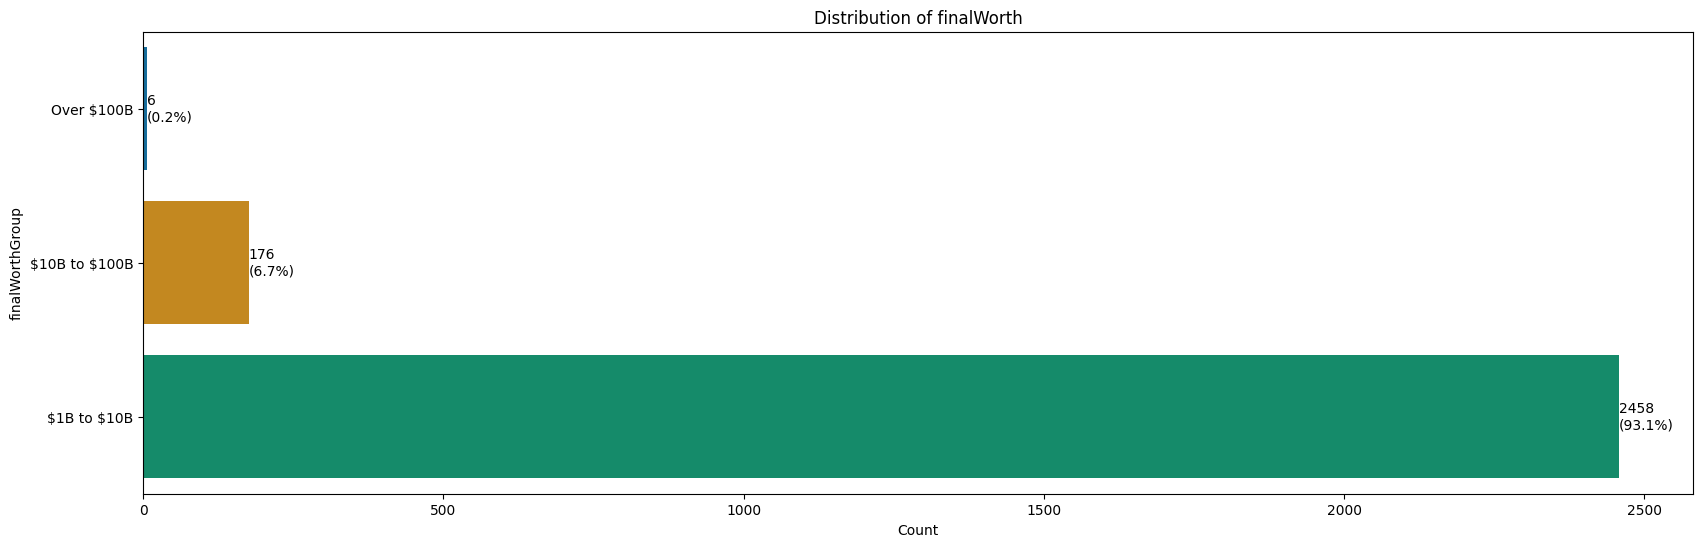

In [24]:
plt.figure(figsize=(20, 6))


bins = [1000, 10000, 100000, float('inf')]
labels = ['\\$1B to \\$10B', '\\$10B to \\$100B', 'Over \\$100B']

df['finalWorthGroup'] = pd.cut(df['finalWorth'], bins=bins, labels=labels, right=False)

order = ['Over \\$100B', '\\$10B to \\$100B', '\\$1B to \\$10B']
ax = sns.countplot(y='finalWorthGroup', data=df, palette='colorblind',order=order)

for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}' + f'\n({100*int(width)/df.shape[0]:.1f}%)', va='center')


df = df.drop(columns=['finalWorthGroup'])
plt.title('Distribution of finalWorth')
plt.xlabel('Count')
plt.show()

In [25]:
df[df.finalWorth>100000][['finalWorth','personName','age','countryOfCitizenship','industries']]

,finalWorth,personName,age,countryOfCitizenship,industries
0,211000,Bernard Arnault & family,74.0,France,Fashion & Retail
1,180000,Elon Musk,51.0,United States,Automotive
2,114000,Jeff Bezos,59.0,United States,Technology
3,107000,Larry Ellison,78.0,United States,Technology
4,106000,Warren Buffett,92.0,United States,Finance & Investments
5,104000,Bill Gates,67.0,United States,Technology


<Figure size 3000x500 with 0 Axes>

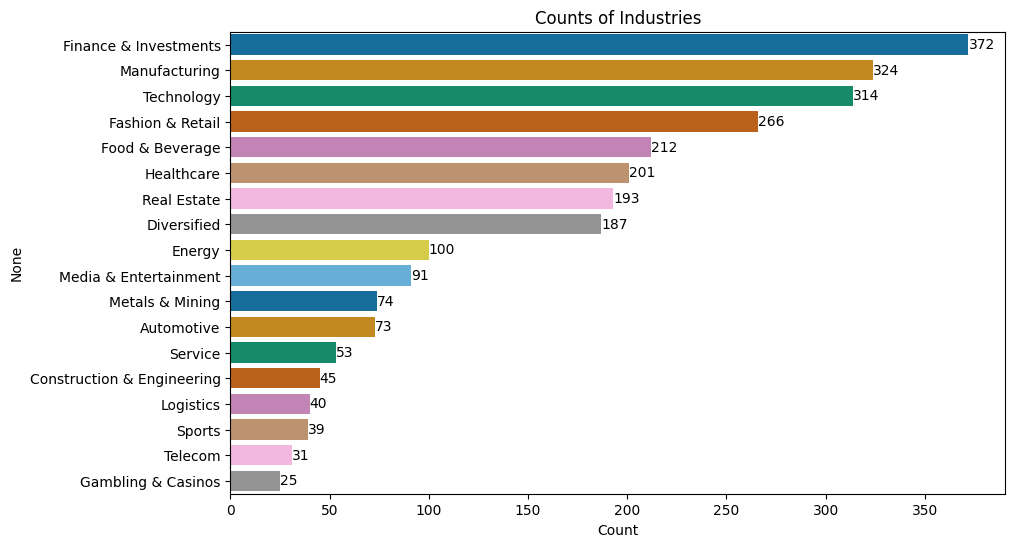

In [26]:
plt.figure(figsize=(30, 5))

industry_counts = df['industries'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='colorblind')

for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.xlabel('Count')

plt.title('Counts of Industries')

plt.show()

In [27]:
total_final_worth = df['finalWorth'].sum()
fig = px.pie(df, values='finalWorth', names='industries', hole=0.7,
             title=f'Percentage of finalWorth by Industry (Total: ${total_final_worth} M)')

fig.add_annotation(text='$' +str(total_final_worth) +' M', x=0.5, y=0.5, showarrow=False)
fig.update_layout(width=1000, height=535)
fig.show()


In [28]:
industries_list = []

fig = sp.make_subplots(rows=len(industry_counts), cols=1)

for i in industry_counts.index:
    max_finalWorth = df[df.industries == i]['finalWorth'].max()
    personName = df[(df['industries'] == i) & (df['finalWorth'] == max_finalWorth)]['personName'].values[0]

    industries_list.append({
                            'Industry' : i,
                            'finalWorth' : max_finalWorth/1000,
                            'personName' : personName
                            })

df_result = pd.DataFrame(industries_list)
df_result = df_result.sort_values(by='finalWorth', ascending=False)
df_result['finalWorth'] = df_result['finalWorth'].apply(format_final_worth)

table = go.Figure(data=[go.Table(
    header=dict(values=['Industry', 'finalWorth', 'personName']),
    cells=dict(values=[df_result['Industry'], df_result['finalWorth'], df_result['personName']])
)])

table.update_layout(width=800, height=670)

table.show()

In [29]:
gender_distribution_df = df.groupby('industries')['gender'].value_counts().unstack().fillna(0)

self_made_distribution_df = df.groupby('industries')['selfMade'].value_counts().unstack().fillna(0)

gender_distribution_df.columns = ['Female', 'Male']
self_made_distribution_df.columns = ['Non-Self-Made', 'Self-Made']


industry_analysis_df = pd.merge(gender_distribution_df, self_made_distribution_df, left_index=True, right_index=True)

industry_analysis_df.reset_index(inplace=True)

industry_analysis_df.Male = industry_analysis_df.Male.astype(int)
industry_analysis_df.Female= industry_analysis_df.Female.astype(int)

industry_analysis_df['Billionaire Count'] = industry_analysis_df['Male'] + industry_analysis_df['Female']

industry_analysis_df = industry_analysis_df.sort_values(by='Billionaire Count', ascending=False).reset_index().drop(columns = 'index')


table = go.Figure(data=[go.Table(
    header=dict(values=['Industry','Billionaire Count', 'Male', 'Female','Self-Made','Non-Self-Made']),
    cells=dict(values=[industry_analysis_df['industries'], industry_analysis_df['Billionaire Count'], industry_analysis_df['Male'],industry_analysis_df['Female'],industry_analysis_df['Self-Made'],industry_analysis_df['Non-Self-Made']])
)])

table.update_layout(width=900, height=800)

table.show()

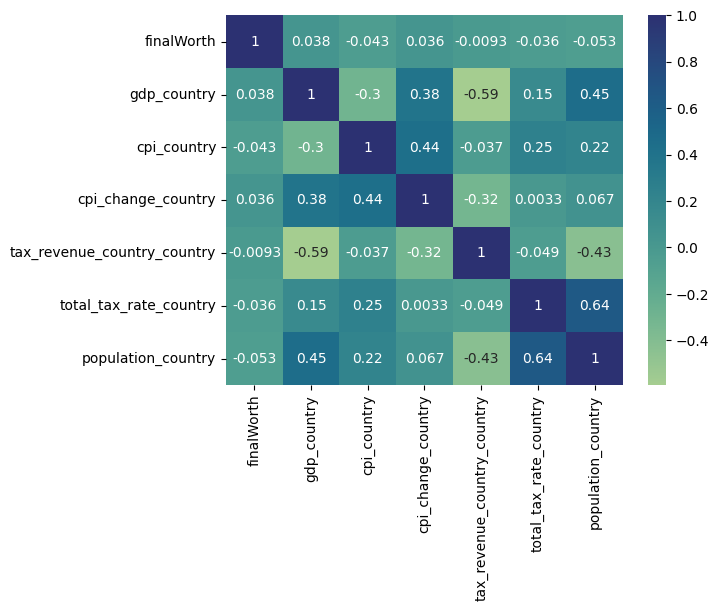

In [30]:
correlation_data = df[[
    'finalWorth',
    'gdp_country',
    'cpi_country',
    'cpi_change_country',
    'tax_revenue_country_country',
    'total_tax_rate_country',
    'population_country'
]]

sns.heatmap(correlation_data.corr(),annot=True,cmap="crest")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
